# Neuron Excitation Model 1

Teng-Jui Lin

Content adapted from UW AMATH 301, Beginning Scientific Computing. Although not covered in Spring 2020, the topic is presented in previous years.

- Phase portraits
    - FitzHugh-Nagumo neuron excitation model
      - Base case: neural excitation
      - Exploration: one-eyed phase portrait
      - Exploration: loop phase portrait
      - Exploration: two-eyed phase portrait

## FitzHugh-Nagumo neuron excitation model

Let $v$ be the membrane voltage, and let $w$ be the activity of several types of membrane channel proteins. The FitzHugh-Nagumo model describes the excitation of neuron membrane over time with the system of ODEs

$$
\begin{aligned}
\dot{v} &= v - \dfrac{1}{3}v^3-w+I(t) \\
\dot{w} &= \dfrac{a+v-bw}{\tau}
\end{aligned}
$$

with an external electrical current $I(t)$. The constant parameters $a, b, \tau$ controls the activity of channel proteins.

### Base case: neural excitation

**Problem Statement.** With the initial conditions of $v(0) = 1$ and $w(0) = 0$, solve the FitzHugh-Nagumo model with parameters $a=0.7, b=0.8, \tau=12.5$ and external current of

$$
I(t) = \dfrac{1}{10} \left( 5 + \sin\left(\dfrac{\pi t}{10}\right)\right).
$$

- Generate plots of $v(t)$ and $w(t)$ over time in the intervals $t \in [0, 50]$ and $t \in [0, 200]$.
- Generate an animated phase portrait over time in the interval $t \in [0, 50]$.

Note on animation: for local reproducible results, [download ffmpeg and add to path variable](https://www.thewindowsclub.com/how-to-install-ffmpeg-on-windows-10). For reproducible results online, use Google Colab and run the command below.

In [1]:
# Run the command in Google Colab for reproducible results online
# !apt install ffmpeg

#### Plot over time

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import integrate

In [3]:
# model params
a = 0.7
b = 0.8
tau = 12.5

In [4]:
# time array
t_initial = 0
t_final = 200
t = np.linspace(t_initial, t_final, 4000)
t_len = len(t)

In [5]:
# ode system
I = lambda t : 1/10*(5 + np.sin(np.pi*t/10))
dvdt = lambda t, v, w : v - 1/3*v**3 - w + I(t)
dwdt = lambda t, v, w : (a + v - b*w) / tau
ode_syst = lambda t, z : np.array([dvdt(t, *z), dwdt(t, *z)])

In [6]:
# grid of initial conditions
initial_vvec = np.linspace(-2.5, 2.5, 10)
initial_wvec = np.linspace(-2, 2, 10)
initial_vals = np.meshgrid(initial_vvec, initial_wvec)
initial_vals = np.array([initial_vals[0].reshape(-1), initial_vals[1].reshape(-1)]).T

In [7]:
# ode soln for grid of initial conditions
ode_solns = [0]*len(initial_vals)
for i in range(len(initial_vals)):
    ode_solns[i] = scipy.integrate.solve_ivp(ode_syst, [t_initial, t_final], initial_vals[i], t_eval=t).y
ode_solns = np.array(ode_solns)

In [8]:
# quiver grid
vvec = np.linspace(-2.5, 2.5, 20)
wvec = np.linspace(-2, 2, 20)
V, W = np.meshgrid(vvec, wvec)

In [9]:
def custom_plot_settings():
    %config InlineBackend.figure_format = 'retina'
    %matplotlib inline

    plt.rcParams.update({
        'font.family': 'Arial',  # Times New Roman, Calibri
        'font.weight': 'normal',
        'mathtext.fontset': 'cm',
        'font.size': 18,

        'lines.linewidth': 2,

        'axes.linewidth': 2,
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.titleweight': 'bold',
        'axes.titlesize': 18,
        'axes.labelweight': 'bold',

        'xtick.major.size': 8,
        'xtick.major.width': 2,
        'ytick.major.size': 8,
        'ytick.major.width': 2,

        'figure.dpi': 80,
        'savefig.dpi': 300,

        'legend.framealpha': 1, 
        'legend.edgecolor': 'black',
        'legend.fancybox': False,
        'legend.fontsize': 14,

        'animation.html': 'html5',
    })

custom_plot_settings()

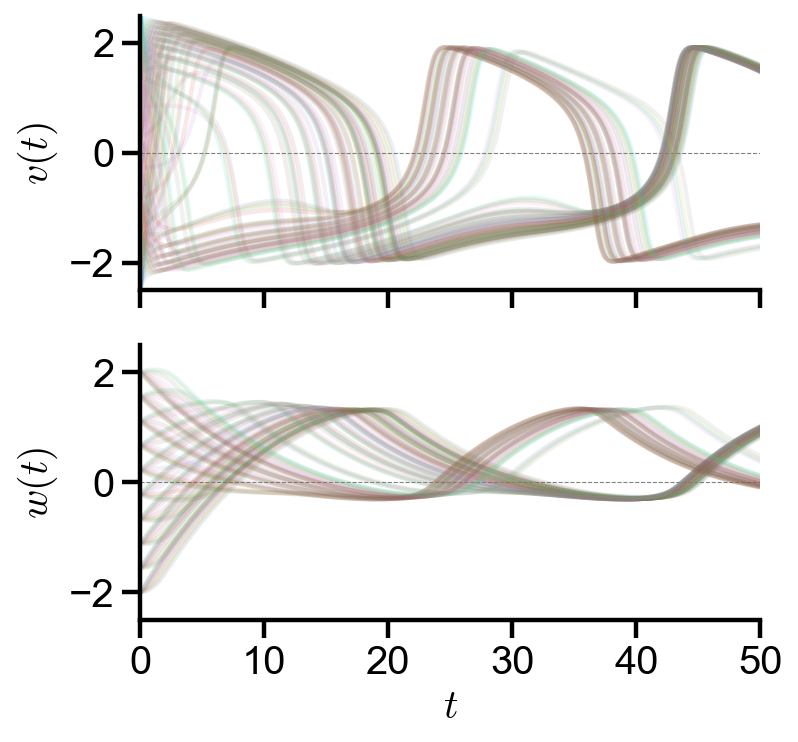

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(5, 5), sharex=True)
axs[0].set_ylabel('$v(t)$')
axs[1].set_ylabel('$w(t)$')
axs[1].set_xlabel('$t$')

for i in range(len(initial_vals)):
    axs[0].plot(t, ode_solns[i, 0], label='$v(t)$', alpha=0.1)
    axs[1].plot(t, ode_solns[i, 1], label='$w(t)$', alpha=0.1)

for i in range(2):
    axs[i].plot([t_initial, t_final], [0, 0], '--', color='grey', lw=0.5, zorder=0)  # zero ref
    axs[i].set_xlim(t_initial, 50)
    axs[i].set_ylim(-2.5, 2.5)

▲ Because of different initial conditions, the plot for $t \in [0, 50]$ gives distinct $v(t)$ and $w(t)$ trajectories for each initial condition.

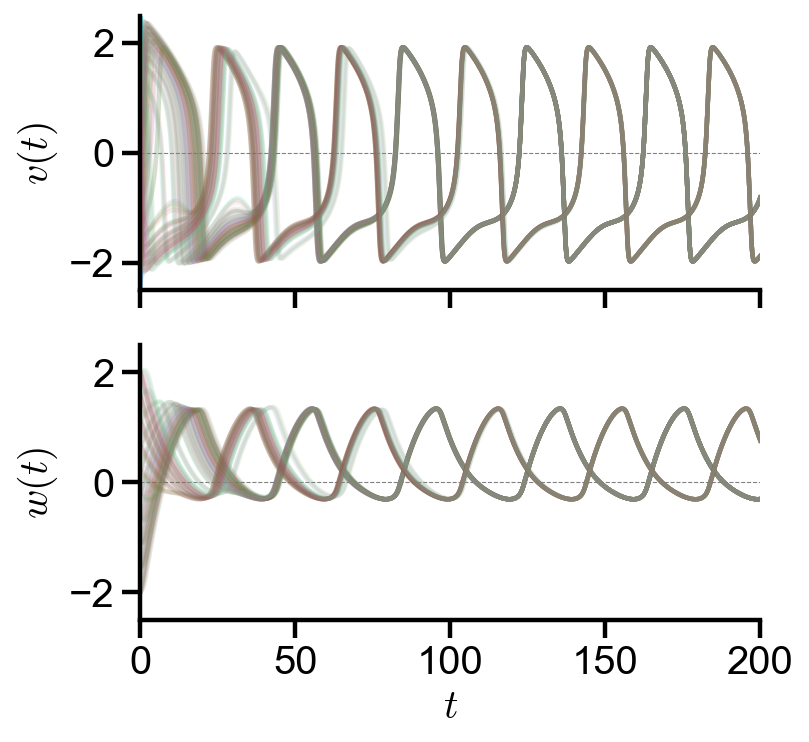

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(5, 5), sharex=True)
axs[0].set_ylabel('$v(t)$')
axs[1].set_ylabel('$w(t)$')
axs[1].set_xlabel('$t$')

for i in range(len(initial_vals)):
    axs[0].plot(t, ode_solns[i, 0], label='$v(t)$', alpha=0.1)
    axs[1].plot(t, ode_solns[i, 1], label='$w(t)$', alpha=0.1)

for i in range(2):
    axs[i].plot([t_initial, t_final], [0, 0], '--', color='grey', lw=0.5, zorder=0)  # zero ref
    axs[i].set_xlim(t_initial, t_final)
    axs[i].set_ylim(-2.5, 2.5)

▲ For $t \in [0, 200]$, the $v(t)$ and $w(t)$ trajectories converges for all initial conditions as time increases.

#### Animated phase portrait

In [12]:
# ## interactive plot 
# ## uncomment for testing
# ## used for checking time series before making animation
# ## can be used to test all animation below

# # plot settings
# custom_plot_settings()
# %matplotlib qt

# # plot static portion
# fig, ax = plt.subplots(figsize=(5, 5))
# ax.set_xlim(-2.5, 2.5)
# ax.set_ylim(-2, 2)
# ax.set_xlabel('$v(t)$')
# ax.set_ylabel('$w(t)$')
# plt.tight_layout()

# # plot empty framework
# points = np.zeros(len(initial_vals), dtype=object)
# current_points = np.zeros(len(initial_vals), dtype=object)
# for i in range(len(initial_vals)):
#     points[i], = ax.plot([], [], '.', color='black', alpha=0.05)
#     current_points[i], = ax.plot([], [], '.', color='red', alpha=0.2, zorder=10)
# scale = np.sqrt(dvdt(t[0], V, W)**2 + dwdt(t[0], V, W)**2)
# qr = ax.quiver(V, W, dvdt(t[0], V, W)/scale, dwdt(t[0], V, W)/scale,
#                scale, cmap='winter_r', scale=20, width=0.005, zorder=3)
# title = ax.set_title('')

# # animation parameters
# t_range = int(t_len/4)  # manually set t range, default t_len
# anim_time = 20  # s
# fps = 60
# frame_num = int(fps * anim_time)

# # update changes each frame
# for n in range(frame_num):
#     time_points = round(t_range/frame_num)
#     frame_final_time = min(time_points*n+time_points, t_range-1)  # avoid index out of range
#     for i in range(len(initial_vals)):
#         points[i].set_data(ode_solns[i, :, :frame_final_time])
#         current_points[i].set_data(*ode_solns[i, :, frame_final_time-1:frame_final_time])
#     scale = np.sqrt(dvdt(t[frame_final_time], V, W)**2 + dwdt(t[frame_final_time], V, W)**2)
#     qr.set_UVC(dvdt(t[frame_final_time], V, W)/scale, dwdt(t[frame_final_time], V, W)/scale, C=scale)
#     title.set_text(f't = {t[frame_final_time] :.3f}')
#     plt.pause(0.0001)

In [13]:
# back to static plot and animations
custom_plot_settings()

# plot static portion
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2, 2)
ax.set_xlabel('$v(t)$')
ax.set_ylabel('$w(t)$')
plt.tight_layout()

# plot empty framework
points = np.zeros(len(initial_vals), dtype=object)
current_points = np.zeros(len(initial_vals), dtype=object)
for i in range(len(initial_vals)):
    points[i], = ax.plot([], [], '.', color='black', alpha=0.05)
    current_points[i], = ax.plot([], [], '.', color='red', alpha=0.2, zorder=10)
scale = np.sqrt(dvdt(t[0], V, W)**2 + dwdt(t[0], V, W)**2)
qr = ax.quiver(V, W, dvdt(t[0], V, W)/scale, dwdt(t[0], V, W)/scale,
               scale, cmap='winter_r', scale=20, width=0.005, zorder=3)
title = ax.set_title('')


def draw_frame(n):
    '''
    Commands to update parameters.
    Here, the phase portrait data points and quiver each frame.
    '''
    time_points = round(t_range/frame_num)
    frame_final_time = min(time_points*n+time_points, t_range-1)  # avoid index out of range
    for i in range(len(initial_vals)):
        points[i].set_data(ode_solns[i, :, :frame_final_time])
        current_points[i].set_data(*ode_solns[i, :, frame_final_time-1:frame_final_time])
    scale = np.sqrt(dvdt(t[frame_final_time], V, W)**2 + dwdt(t[frame_final_time], V, W)**2)
    qr.set_UVC(dvdt(t[frame_final_time], V, W)/scale, dwdt(t[frame_final_time], V, W)/scale, C=scale)
    title.set_text(f't = {t[frame_final_time] :.3f}')
    return fig,

# create animation of given time length
# note here we fit all the data points into the given animation time
from matplotlib import animation
t_range = int(t_len/4)  # manually set t range, default t_len
anim_time = 4  # s
fps = 60
frame_num = int(fps * anim_time)
anim = animation.FuncAnimation(fig, draw_frame, frames=frame_num, interval=1000/fps, blit=True)

plt.close()  # disable showing initial frame

In [14]:
# convert animation to video (time-limiting step)
from IPython.display import HTML
HTML(anim.to_html5_video() + '<style>video{width: 400px !important; height: auto;}</style>')

▲ The above animation shows the time-dependent phase portrait of $v(t)$ and $w(t)$ in time interval $t \in [0, 50]$. Even though the initial conditions are spread apart, they eventually goes into a loop centered around $(v, w) = (0, 0.5)$. Note that the slope field changes (oscillates) with time. The quivers with large angles that form a polynomial-like shape change the most over time.

## Exploration: one-eyed phase portrait

**Problem Statement.** With the initial conditions of $v(0) = 1$ and $w(0) = 0$, solve the FitzHugh-Nagumo model with parameters $a=1, b=1, \tau=1$ and external current of $I(t) = 0$.

- Generate plots of $v(t)$ and $w(t)$ over time in the interval $t \in [0, 8]$.
- Generate an animated phase portrait over time in the interval $t \in [0, 8]$.

In [15]:
# model params
a = 1
b = 1
tau = 1

# time array
t_initial = 0
t_final = 8
dt = 0.01
t = np.arange(t_initial, t_final+dt/2, dt)
t_len = len(t)

# ode system
I = lambda t : 0
dvdt = lambda t, v, w : v - 1/3*v**3 - w + I(t)
dwdt = lambda t, v, w : (a + v - b*w) / tau
ode_syst = lambda t, z : np.array([dvdt(t, *z), dwdt(t, *z)])

# grid of initial conditions
initial_vvec = np.linspace(-2.5, 2.5, 10)
initial_wvec = np.linspace(-2, 2, 10)
initial_vals = np.meshgrid(initial_vvec, initial_wvec)
initial_vals = np.array([initial_vals[0].reshape(-1), initial_vals[1].reshape(-1)]).T

# ode soln for grid of initial conditions
ode_solns = [0]*len(initial_vals)
for i in range(len(initial_vals)):
    ode_solns[i] = scipy.integrate.solve_ivp(ode_syst, [t_initial, t_final], initial_vals[i], t_eval=t).y
ode_solns = np.array(ode_solns)

# quiver grid
vvec = np.linspace(-2.5, 2.5, 20)
wvec = np.linspace(-2, 2, 20)
V, W = np.meshgrid(vvec, wvec)

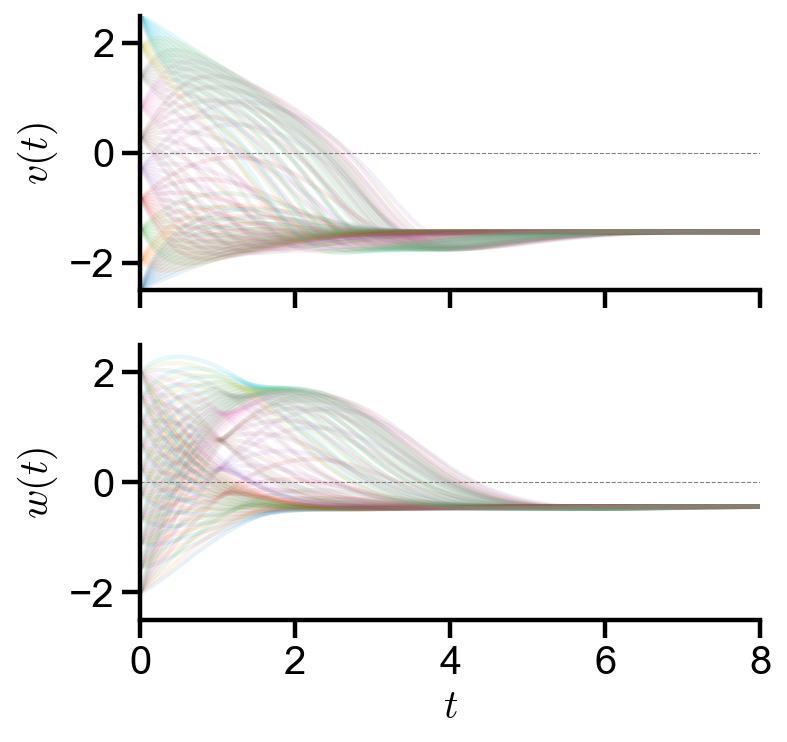

In [16]:
custom_plot_settings()
fig, axs = plt.subplots(2, 1, figsize=(5, 5), sharex=True)
axs[0].set_ylabel('$v(t)$')
axs[1].set_ylabel('$w(t)$')
axs[1].set_xlabel('$t$')

for i in range(len(initial_vals)):
    axs[0].plot(t, ode_solns[i, 0], label='$v(t)$', alpha=0.1)
    axs[1].plot(t, ode_solns[i, 1], label='$w(t)$', alpha=0.1)

for i in range(2):
    axs[i].plot([t_initial, t_final], [0, 0], '--', color='grey', lw=0.5, zorder=0)  # zero ref
    axs[i].set_xlim(t_initial, t_final)
    axs[i].set_ylim(-2.5, 2.5)

In [17]:
def make_animation(t_range=t_len, anim_time=4, fps=60, xmin=-2.5, xmax=2.5, ymin=-2, ymax=2):
    '''
    This function is notebook-specific and not meant to generalize to other settings.
    Makes animation of time-dependent phase portrait.
    Warning: Many parameters are taken from the global namespace. They need to be defined before use.
    '''
    # back to static plot and animations
    custom_plot_settings()

    # plot static portion
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel('$v(t)$')
    ax.set_ylabel('$w(t)$')
    plt.tight_layout()

    # plot empty framework
    points = np.zeros(len(initial_vals), dtype=object)
    current_points = np.zeros(len(initial_vals), dtype=object)
    for i in range(len(initial_vals)):
        points[i], = ax.plot([], [], '.', color='black', alpha=0.05)
        current_points[i], = ax.plot([], [], '.', color='red', alpha=0.2, zorder=10)
    scale = np.sqrt(dvdt(t[0], V, W)**2 + dwdt(t[0], V, W)**2)
    qr = ax.quiver(V, W, dvdt(t[0], V, W)/scale, dwdt(t[0], V, W)/scale,
                   scale, cmap='winter_r', scale=20, width=0.005, zorder=3)
    title = ax.set_title('')


    def draw_frame(n):
        '''
        Commands to update parameters.
        Here, the phase portrait data points and quiver each frame.
        '''
        time_points = round(t_range/frame_num)
        frame_final_time = min(time_points*n+time_points, t_range-1)  # avoid index out of range
        for i in range(len(initial_vals)):
            points[i].set_data(ode_solns[i, :, :frame_final_time])
            current_points[i].set_data(*ode_solns[i, :, frame_final_time-1:frame_final_time])
        scale = np.sqrt(dvdt(t[frame_final_time], V, W)**2 + dwdt(t[frame_final_time], V, W)**2)
        qr.set_UVC(dvdt(t[frame_final_time], V, W)/scale, dwdt(t[frame_final_time], V, W)/scale, C=scale)
        title.set_text(f't = {t[frame_final_time] :.3f}')
        return fig,

    # create animation of given time length
    # note here we fit all the data points into the given animation time
    from matplotlib import animation
    frame_num = int(fps * anim_time)
    anim = animation.FuncAnimation(fig, draw_frame, frames=frame_num, interval=1000/fps, blit=True)
    
    plt.close()  # disable showing initial frame
    
    return anim

In [18]:
# convert animation to video (time-limiting step)
from IPython.display import HTML
anim = make_animation();  # uses custom function above
HTML(anim.to_html5_video() + '<style>video{width: 400px !important; height: auto;}</style>')

## Exploration: loop phase portrait

**Problem Statement.** With the initial conditions of $v(0) = 1$ and $w(0) = 0$, solve the FitzHugh-Nagumo model with parameters $a=1, b=1, \tau=1$ and constant external current of $I(t) = 1$.

- Generate plots of $v(t)$ and $w(t)$ over time in the interval $t \in [0, 50]$ and $t \in [0, 12.5]$.
- Generate an animated phase portrait over time in the interval $t \in [0, 50]$ and $t \in [0, 12.5]$.

In [19]:
# model params
a = 1
b = 1
tau = 1

# time array
t_initial = 0
t_final = 50
t = np.linspace(t_initial, t_final, 1000)
t_len = len(t)

# ode system
I = lambda t : 1
dvdt = lambda t, v, w : v - 1/3*v**3 - w + I(t)
dwdt = lambda t, v, w : (a + v - b*w) / tau
ode_syst = lambda t, z : np.array([dvdt(t, *z), dwdt(t, *z)])

# grid of initial conditions
initial_vvec = np.linspace(-2.5, 2.5, 10)
initial_wvec = np.linspace(-2, 2, 10)
initial_vals = np.meshgrid(initial_vvec, initial_wvec)
initial_vals = np.array([initial_vals[0].reshape(-1), initial_vals[1].reshape(-1)]).T

# ode soln for grid of initial conditions
ode_solns = [0]*len(initial_vals)
for i in range(len(initial_vals)):
    ode_solns[i] = scipy.integrate.solve_ivp(ode_syst, [t_initial, t_final], initial_vals[i], t_eval=t).y
ode_solns = np.array(ode_solns)

# quiver grid
vvec = np.linspace(-2.5, 2.5, 20)
wvec = np.linspace(-2, 2, 20)
V, W = np.meshgrid(vvec, wvec)
custom_plot_settings()

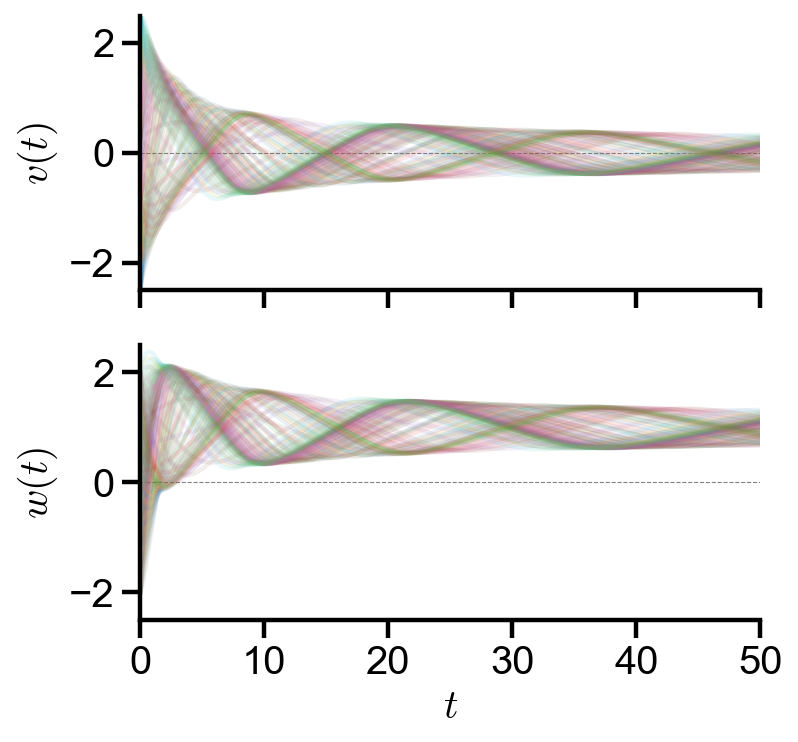

In [20]:
fig, axs = plt.subplots(2, 1, figsize=(5, 5), sharex=True)
axs[0].set_ylabel('$v(t)$')
axs[1].set_ylabel('$w(t)$')
axs[1].set_xlabel('$t$')

for i in range(len(initial_vals)):
    axs[0].plot(t, ode_solns[i, 0], label='$v(t)$', alpha=0.1)
    axs[1].plot(t, ode_solns[i, 1], label='$w(t)$', alpha=0.1)

for i in range(2):
    axs[i].plot([t_initial, t_final], [0, 0], '--', color='grey', lw=0.5, zorder=0)  # zero ref
    axs[i].set_xlim(t_initial, t_final)
    axs[i].set_ylim(-2.5, 2.5)

In [21]:
# convert animation to video (time-limiting step)
from IPython.display import HTML
anim = make_animation()  # uses custom function above
HTML(anim.to_html5_video() + '<style>video{width: 400px !important; height: auto;}</style>')

In [22]:
# convert animation to video (time-limiting step)
from IPython.display import HTML
anim = make_animation(t_range=int(t_len/4))  # uses custom function above
HTML(anim.to_html5_video() + '<style>video{width: 400px !important; height: auto;}</style>')

## Exploration: two-eyed phase portrait

**Problem Statement.** With the initial conditions of $v(0) = 1$ and $w(0) = 0$, solve the FitzHugh-Nagumo model with parameters $a=2, b=2, \tau=2$ and constant external current of $I(t) = 1$.

- Generate plots of $v(t)$ and $w(t)$ over time in the interval $t \in [0, 8]$.
- Generate an animated phase portrait over time in the interval $t \in [0, 8]$.

In [23]:
# model params
a = 2
b = 2
tau = 2

# time array
t_initial = 0
t_final = 8
dt = 0.01
t = np.arange(t_initial, t_final+dt/2, dt)  #np.linspace(t_initial, t_final, 1000)
t_len = len(t)

# ode system
I = lambda t : 1
dvdt = lambda t, v, w : v - 1/3*v**3 - w + I(t)
dwdt = lambda t, v, w : (a + v - b*w) / tau
ode_syst = lambda t, z : np.array([dvdt(t, *z), dwdt(t, *z)])

# grid of initial conditions
initial_vvec = np.linspace(-2.5, 2.5, 10)
initial_wvec = np.linspace(-2, 2, 10)
initial_vals = np.meshgrid(initial_vvec, initial_wvec)
initial_vals = np.array([initial_vals[0].reshape(-1), initial_vals[1].reshape(-1)]).T

# ode soln for grid of initial conditions
ode_solns = [0]*len(initial_vals)
for i in range(len(initial_vals)):
    ode_solns[i] = scipy.integrate.solve_ivp(ode_syst, [t_initial, t_final], initial_vals[i], t_eval=t).y
ode_solns = np.array(ode_solns)

# quiver grid
vvec = np.linspace(-2.5, 2.5, 20)
wvec = np.linspace(-2, 2, 20)
V, W = np.meshgrid(vvec, wvec)
custom_plot_settings()

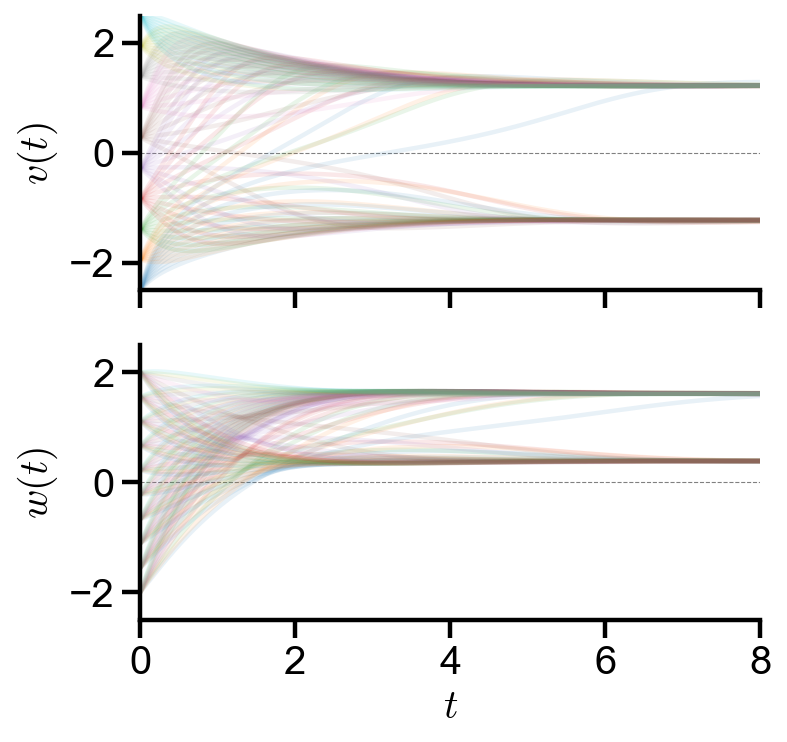

In [24]:
fig, axs = plt.subplots(2, 1, figsize=(5, 5), sharex=True)
axs[0].set_ylabel('$v(t)$')
axs[1].set_ylabel('$w(t)$')
axs[1].set_xlabel('$t$')

for i in range(len(initial_vals)):
    axs[0].plot(t, ode_solns[i, 0], label='$v(t)$', alpha=0.1)
    axs[1].plot(t, ode_solns[i, 1], label='$w(t)$', alpha=0.1)

for i in range(2):
    axs[i].plot([t_initial, t_final], [0, 0], '--', color='grey', lw=0.5, zorder=0)  # zero ref
    axs[i].set_xlim(t_initial, t_final)
    axs[i].set_ylim(-2.5, 2.5)

In [25]:
# convert animation to video (time-limiting step)
from IPython.display import HTML
anim = make_animation()  # uses custom function above
HTML(anim.to_html5_video() + '<style>video{width: 400px !important; height: auto;}</style>')